In [1]:
%matplotlib inline

import pandas as pd
import pandas_profiling

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import PowerTransformer
from sklearn import decomposition

/Users/louise/miniconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/louise/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/louise/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/louise/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/louise/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/louise/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line

In [2]:
df = pd.read_csv('../backend/static/census.csv')

In [3]:
pandas_profiling.ProfileReport(df)

In [4]:
# Age Ranges
pt = PowerTransformer()

pca = decomposition.PCA(n_components=4)

tbl = df.iloc[:, range(10,23)]

XX = tbl.sample(250)
pca.fit(pt.fit_transform(tbl))
X = pca.transform(pt.transform(XX))
X = pd.DataFrame(X)

In [5]:
pd.DataFrame(pca.components_, columns=tbl.columns, index=["Boomers", "Gen Z", "Millenials", "Gen X" ])

AGE_UNDER_5   AGE_5_9  AGE_10_14  AGE_15_19  AGE_20_24  AGE_25_34  \
Boomers       -0.321685 -0.297747  -0.237595  -0.245015  -0.271219  -0.299908   
Gen Z         -0.278032 -0.470077  -0.428586   0.259100   0.429930  -0.047637   
Millenials     0.361385  0.042855  -0.369586  -0.388911   0.119493   0.517202   
Gen X         -0.056099 -0.067704  -0.179931  -0.471181  -0.312710   0.198383   

            AGE_35_44  AGE_45_54  AGE_55_59  AGE_60_64  AGE_65_74  AGE_75_84  \
Boomers     -0.248924   0.080317   0.235732   0.314676   0.404386   0.323085   
Gen Z       -0.330888  -0.074599  -0.165997  -0.171465  -0.119105  -0.190005   
Millenials  -0.231734  -0.415507  -0.076331   0.055572   0.064601   0.141896   
Gen X        0.059830   0.214454   0.149966   0.015833  -0.044863  -0.403235   

            AGE_85_OVER  
Boomers        0.192253  
Gen Z         -0.203725  
Millenials     0.195890  
Gen X         -0.603173

In [6]:
toy = np.zeros_like(range(11,23))
toy[4:5] = 33
toy[0] = 33
print(toy)
print(pt.transform(toy.reshape(1,-1)))
toy = pca.transform(pt.transform(toy.reshape(1,-1)))

toy

[33  0  0  0 33  0  0  0  0  0  0  0]


ValueError: Input data has a different number of features than fitting data. Should have 13, data has 12

In [ ]:
x = X[0].values
y = X[1].values
z = X[2].values
zz = X[3].values
#c = np.sqrt(x**2+y**2)

plt.scatter(z, x, alpha=.3, c=XX.iloc[:,0], cmap='viridis') # c=c, cmap='viridis')
plt.colorbar()

In [ ]:
df.iloc[:2, range(36,46)]

In [ ]:
# Income level

tbl = df.iloc[:, range(36,46)]

pca.fit(pt.fit_transform(tbl))
XX = tbl.sample(250)
X = pt.transform(XX)
#X = pd.DataFrame(X)
X = pca.transform(X)
X = pd.DataFrame(X)

In [ ]:
pd.DataFrame(pca.components_, columns=tbl.columns)

In [ ]:
#XX = X.sample(1000)

x = X.iloc[:,0].values
y = X.iloc[:,1].values
z = X[2].values

#c = np.sqrt(x**2+y**2)

plt.scatter(x, y, alpha=.5, c=XX.iloc[:,-1], cmap='viridis')
plt.colorbar()

In [ ]:
tbl = df.iloc[:, [30, 31,32, 34, 35]]

pca.fit(pt.fit_transform(tbl))
XX = tbl.sample(250)
X = pt.transform(XX)
#X = pd.DataFrame(X)
X = pca.transform(X)
X = pd.DataFrame(X)

In [ ]:
pd.DataFrame(pca.components_, columns=tbl.columns)

In [ ]:
df.iloc[:2, -9:]

In [ ]:
tbl = df.iloc[:, -9:]

pca.fit(pt.fit_transform(tbl))
XX = tbl.sample(250)
X = pt.transform(XX)
#X = pd.DataFrame(X)
X = pca.transform(X)
X = pd.DataFrame(X)

In [ ]:
pd.DataFrame(pca.components_, columns=tbl.columns)

In [46]:
ages = df.iloc[:, range(10,23)]

ages = ages.assign(
    genZ = df.iloc[:, range(10,13)].sum(axis=1),
    millenial = df.iloc[:, range(13,16)].sum(axis=1),
    genX = df.iloc[:, range(16,18)].sum(axis=1),
    boomer = df.iloc[:, range(18,21)].sum(axis=1),
    silent = df.iloc[:, range(21,23)].sum(axis=1),
)

ages = ages.iloc[:, [-1, -2, -3, -4, -5]]

In [ ]:
# Income level

tbl = ages.iloc[:, :-1]

pca.fit(pt.fit_transform(tbl))
XX = tbl.sample(250)
X = pt.transform(XX)
#X = pd.DataFrame(X)
X = pca.transform(X)
X = pd.DataFrame(X)

In [ ]:
pd.DataFrame(pca.components_, columns=tbl.columns)

In [ ]:
x = X.iloc[:,0].values
y = X.iloc[:,1].values
z = X[2].values

#c = np.sqrt(x**2+y**2)

plt.scatter(x, y, alpha=.5, c=XX.iloc[:,-2], cmap='viridis')
plt.colorbar()

In [ ]:
toy = np.zeros_like(ages.iloc[:2, :-1])
toy = np.eye(4)*100
print(toy)
print(pt.transform(toy))
toy = pca.transform(pt.transform(toy))

toy

In [ ]:
df.iloc[:2, range(36,46)]

In [17]:
income = df.iloc[:, range(36,46)]

income = income.assign(
    lowIncome = df.iloc[:, range(36,40)].sum(axis=1),
    middleIncome = df.iloc[:, range(40,42)].sum(axis=1),
    highIncome = df.iloc[:, range(42,46)].sum(axis=1),
)

income = income.iloc[:, -3:]

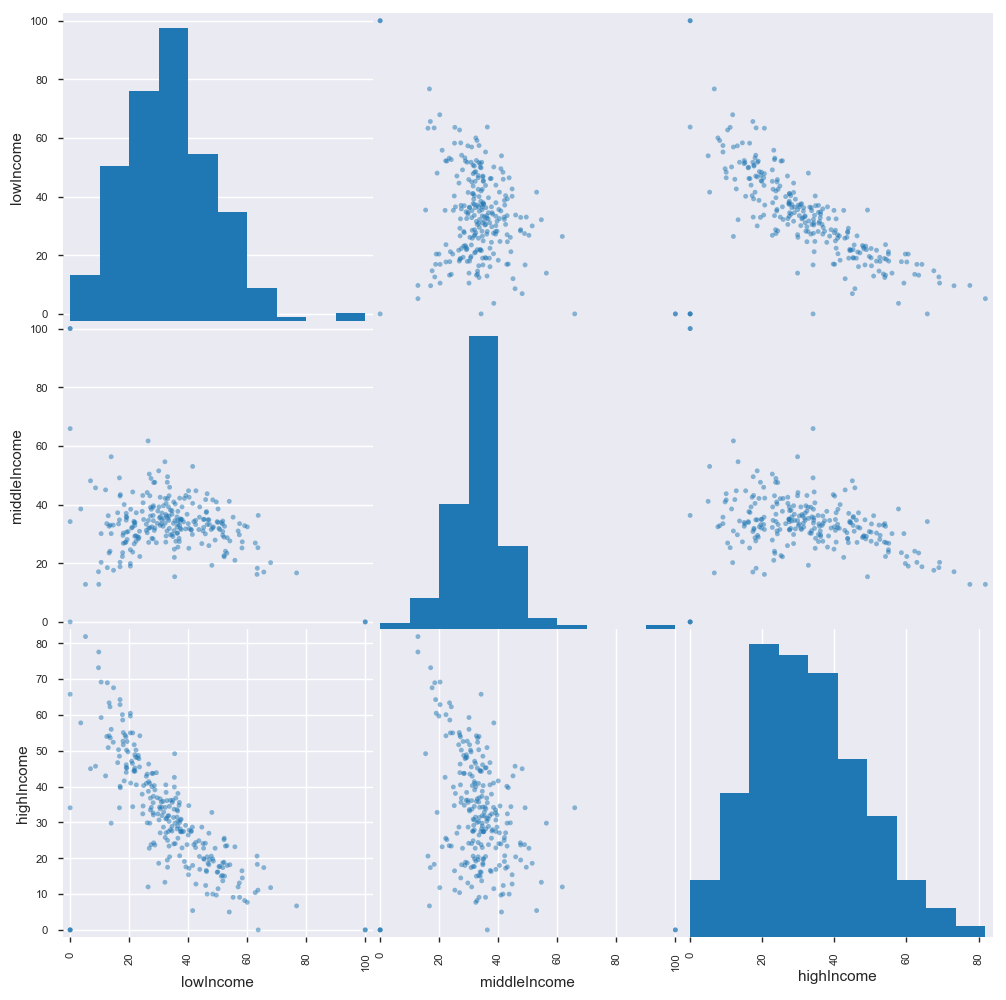

In [18]:
pd.plotting.scatter_matrix(income.sample(250), figsize=(12, 12));

In [20]:
d = {}
i = 0
for col in df.columns:
    d[i] = col
    i += 1
    
d

{0: 'ZIP',
 1: 'padded_zip',
 2: 'Geography',
 3: 'LON',
 4: 'LAT',
 5: 'CITY',
 6: 'STATECODE',
 7: 'MSA_CODE',
 8: 'SEX_MALE',
 9: 'SEX_FEMALE',
 10: 'AGE_UNDER_5',
 11: 'AGE_5_9',
 12: 'AGE_10_14',
 13: 'AGE_15_19',
 14: 'AGE_20_24',
 15: 'AGE_25_34',
 16: 'AGE_35_44',
 17: 'AGE_45_54',
 18: 'AGE_55_59',
 19: 'AGE_60_64',
 20: 'AGE_65_74',
 21: 'AGE_75_84',
 22: 'AGE_85_OVER',
 23: 'RACE_WHITE',
 24: 'RACE_OTHER',
 25: 'RACE_HAW_PAC',
 26: 'RACE_BLACK',
 27: 'RACE_ASIAN',
 28: 'RACE_IND_AK',
 29: 'RACE_HISP_LAT',
 30: 'BELOW_POVERTY',
 31: 'WITH_SOCIAL_SEC',
 32: 'WITH_RET_INCOME',
 33: 'WITH_FOOD_STAMP',
 34: 'WITH_EARNINGS',
 35: 'WITH_CASH_PUB_ASSIST',
 36: 'INC_LESS_THAN_10K',
 37: 'INC_10K_15K',
 38: 'INC_15K_25K',
 39: 'INC_25K_35K',
 40: 'INC_35K_50K',
 41: 'INC_50K_75K',
 42: 'INC_75K_99K',
 43: 'INC_100K_150K',
 44: 'INC_150K_199K',
 45: 'INC_MORE_THAN_200K',
 46: 'EMP_NOT_IN_LABOR_FORCE',
 47: 'EMP_UNEMPLOYED',
 48: 'EMP_EMPLOYED',
 49: 'COMM_WORK_AT_HOME',
 50: 'COMM_WALK

In [28]:
house = df.iloc[:, [64, 67, 68, 69, 70]]

house = house.assign(HHLD_INDIV = house.iloc[:, -2:].sum(axis=1))

house = house.iloc[:, [0, 1, 2, -1]]

In [29]:
house.sample(4)

HHLD_SPOUSE  HHLD_OWNER  HHLD_CHILD  HHLD_INDIV
11249         25.0        36.3        36.0        26.6
30206         19.5        36.1        31.9        31.7
24040         12.4        35.8        37.0        39.5
18623         21.8        44.3        27.8        45.0

In [30]:
earnings = df.iloc[:, [31, 32, 34]]

In [43]:
edu = df.iloc[:, [75, 76]] 

edu = edu.assign(
    COLLEGE_NO_BACH = df.iloc[: , [77, 72]].sum(axis=1),
    HS_DIP = df.iloc[:, 74],
    NO_HS_DIP = df.iloc[:, [73, 78]].sum(axis=1),
)

edu.sample(3)

EDUC_GRAD_DEG  EDUC_BACH_DEG  COLLEGE_NO_BACH  HS_DIP  NO_HS_DIP
19714            0.0           21.4             19.6    57.1        1.8
2952             4.9           11.1             29.4    37.8       16.8
3556             7.7           11.7             29.9    40.3       10.4

In [36]:
edu.iloc[:3, :].sum(axis=1)

0     99.9
1    100.0
2    100.0
dtype: float64

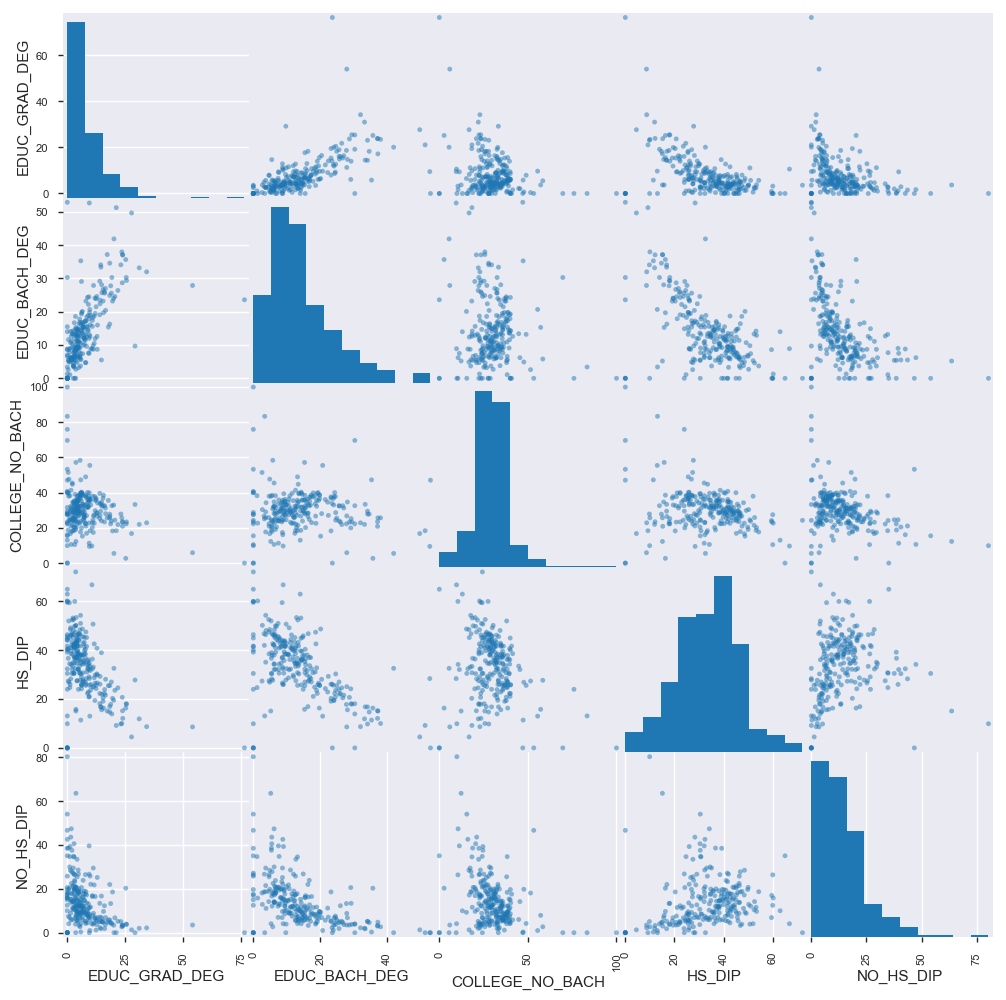

In [44]:
pd.plotting.scatter_matrix(edu.sample(250), figsize=(12, 12));

In [52]:
census = pd.concat([df.iloc[:, [0, 3, 4, 5, 6, 7, 8, 9]], ages, income, house, edu, earnings], axis=1)

census.sample(3)

ZIP        LON        LAT         CITY STATECODE  MSA_CODE  SEX_MALE  \
9384   30103 -84.914492  34.349640  Adairsville        GA       520      47.2   
18104  55012 -92.816791  45.396474  Center City        MN      5120      52.7   
12407  38946 -90.349864  33.378180  Morgan City        MS         0      38.7   

       SEX_FEMALE  silent  boomer      ...        HHLD_CHILD  HHLD_INDIV  \
9384         52.8     3.9    18.2      ...              30.5        29.1   
18104        47.3     6.2    29.4      ...              25.4        33.4   
12407        61.3     5.3    12.6      ...              41.1        25.0   

       EDUC_GRAD_DEG  EDUC_BACH_DEG  COLLEGE_NO_BACH  HS_DIP  NO_HS_DIP  \
9384             3.8            8.6             30.7    36.9       20.0   
18104            6.9           18.3             36.0    35.6        3.3   
12407            2.7            4.3             20.1    66.3        6.5   

       WITH_SOCIAL_SEC  WITH_RET_INCOME  WITH_EARNINGS  
9384              32.2             16.2           74.0  
18104             33.7             25.6           82.6  
12407             26.0              8.3           74.0  

[3 rows x 28 columns]

In [53]:
census.describe()

ZIP           LON           LAT      MSA_CODE      SEX_MALE  \
count  32335.000000  32335.000000  32335.000000  32335.000000  32335.000000   
mean   49375.662347    -90.471693     38.807510   2210.550302     50.187463   
std    27101.603725     13.684287      4.753272   2910.042212      6.709366   
min     1001.000000   -124.636562     24.562514      0.000000      0.000000   
25%    26809.000000    -97.022687     35.473448      0.000000     47.800000   
50%    49629.000000    -88.134016     39.506337      0.000000     49.600000   
75%    71460.000000    -80.265162     42.081977   4480.000000     51.800000   
max    99403.000000    -66.991337     49.309708   9360.000000    100.000000   

         SEX_FEMALE        silent        boomer          genX     millenial  \
count  32335.000000  32335.000000  32335.000000  32335.000000  32335.000000   
mean      49.812664      7.508372     25.276366     25.598135     24.077074   
std        6.709340      6.000342     10.998656      7.357269     10.817830   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       48.200000      4.600000     19.600000     22.900000     19.400000   
50%       50.400000      6.700000     23.800000     26.000000     23.300000   
75%       52.200000      9.100000     28.700000     28.800000     27.400000   
max      100.000000    100.000000    100.000000    100.100000    100.100000   

           ...          HHLD_CHILD    HHLD_INDIV  EDUC_GRAD_DEG  \
count      ...        32335.000000  32335.000000   32335.000000   
mean       ...           27.519013     38.237043       8.433901   
std        ...            8.790378     17.514058       8.614062   
min        ...            0.000000      0.000000       0.000000   
25%        ...           24.000000     28.800000       3.300000   
50%        ...           28.500000     37.500000       5.900000   
75%        ...           32.400000     46.100000      10.700000   
max        ...           80.300000    200.000000     100.000000   

       EDUC_BACH_DEG  COLLEGE_NO_BACH        HS_DIP     NO_HS_DIP  \
count   32335.000000     32335.000000  32335.000000  32335.000000   
mean       14.819966        29.805421     33.721330     13.115009   
std        10.008652        10.239472     13.061053     10.247467   
min         0.000000         0.000000      0.000000      0.000000   
25%         8.200000        24.400000     25.900000      6.200000   
50%        12.800000        29.800000     34.200000     10.800000   
75%        19.600000        34.800000     41.500000     17.500000   
max       100.000000       100.000000    100.000000    100.000000   

       WITH_SOCIAL_SEC  WITH_RET_INCOME  WITH_EARNINGS  
count     32335.000000     32335.000000   32335.000000  
mean         35.533428        20.152912      73.382050  
std          13.806314        10.564456      14.409185  
min           0.000000         0.000000       0.000000  
25%          27.900000        14.300000      68.000000  
50%          34.700000        19.400000      75.600000  
75%          41.900000        24.700000      81.700000  
max         100.000000       100.000000     100.000000  

[8 rows x 26 columns]

In [54]:
pandas_profiling.ProfileReport(census)

In [55]:
census.to_csv('census.csv')